In [2]:
import numpy
import sys
# sys.path.append("/home/wian/Documents/BEng_Hons/Skogestad-Python/")
import utils
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting Singular Values Across Frequency

In [3]:
Kc=1
def G(s):
    G11 = 4.29 / ((6.7 * s + 1))
    G12 = -2.38 / ((8.64 * s + 1))
    G13 = -2.156 / ((9.06 * s + 1))
    G21 = 7.215 / ((3.25 * s + 1))
    G22 = -9.218 / ((5.0 * s + 1))
    G23 = -2.156 / ((9.06 * s + 1))
    G31 = -0.5635 / ((8.15 * s + 1))
    G32 =  0.451143 / ((10.9 * s + 1))
    G33 = 1.1 * (10.1*s + 0.87) / ((3.89 * s + 1)*(18.8*s + 1))
    return numpy.diag([Kc, Kc, Kc])*numpy.matrix([[G11, G12, G13],
                         [G21, G22, G23],
                         [G31, G32, G33]])

In [4]:
omega = numpy.logspace(-3,3,1000)

In [5]:
s = omega*1j

In [6]:
freq_responses = [G(si) for si in s]

In [7]:
def sigma(Gfr):
    return numpy.linalg.svd(Gfr)

In [8]:
sigmas = [sigma(G_fr)[1] for G_fr in freq_responses]
sigmas[0], sigmas[-1]

(array([12.90885544,  2.20753365,  0.55958306]),
 array([2.97775738e-03, 2.84277956e-04, 9.00017580e-05]))

In [9]:
sigmas = numpy.array(sigmas)

Text(0, 0.5, 'Singular Values, $\\sigma$')

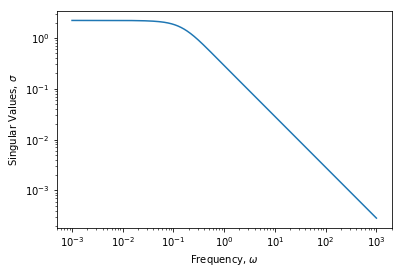

In [13]:
plt.loglog(omega, sigmas[:,1])
plt.xlabel("Frequency, $\omega$")
plt.ylabel("Singular Values, $\sigma$")

In [15]:
numpy.interp(1, sigmas[:,0][::-1], omega[::-1])

2.966140672872925

# Analysing the input and output directions across frequency

In [10]:
def sinusoid(omega, r):
    gain = numpy.abs(r)
    phase = numpy.angle(r)
    return gain*numpy.sin(ts*omega + phase)

In [11]:
ts = numpy.linspace(0,10,1000)

In [12]:
def dirplot(omega_e, index):
    omega_c = 10**omega_e
    plt.subplot(3,1,1)
    plt.axvline(omega_c)
    plt.loglog(omega, sigmas)
    U, sigma, V = numpy.linalg.svd(G(omega_c*1j))
    V = V
    plt.subplot(3,1,2)
    plt.plot(ts, sinusoid(omega_c, V[0,index]))
    plt.plot(ts, sinusoid(omega_c, V[1,index]))
    plt.subplot(3,1,3)
    plt.plot(ts, sigma[0]*sinusoid(omega_c, U[0,index]))
    plt.plot(ts, sigma[0]*sinusoid(omega_c, U[1,index]))

In [13]:
from ipywidgets import interact

In [14]:
interact(dirplot, omega_e = (0.0001, 2), index=[0,1])

interactive(children=(FloatSlider(value=1.00005, description='omega_e', max=2.0, min=0.0001), Dropdown(descrip…

<function __main__.dirplot(omega_e, index)>

# Determining bandwidth and Plotting S($\sigma$)

In [15]:
def S(s):
    return numpy.linalg.inv(numpy.eye(3) + numpy.diag([Kc, Kc, Kc])*G(s))

S(1)

matrix([[ 1.27916167, -0.57940503,  0.13334841],
        [ 4.0758213 , -3.73614148,  0.06473074],
        [-0.06734868,  0.09421673,  0.89430081]])

In [16]:
S_freq_responses = [S(si) for si in s]

In [17]:
S_sigmas = [sigma(G_fr)[1] for G_fr in S_freq_responses]

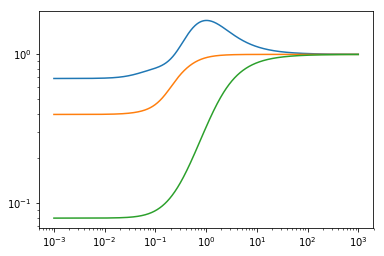

In [18]:
S_sigmas = numpy.array(S_sigmas)
plt.loglog(omega, S_sigmas)

In [19]:
def T(s):
    return G(s)*numpy.linalg.inv(numpy.eye(3) + numpy.diag([Kc, Kc, Kc])*G(s))

In [20]:
T_freq_responses = [T(si) for si in s]

In [21]:
T_sigmas = [sigma(G_fr)[1] for G_fr in T_freq_responses]

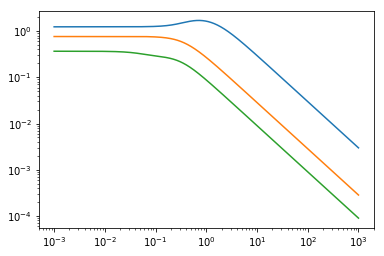

In [22]:
T_sigmas = numpy.array(T_sigmas)
plt.loglog(omega, T_sigmas)

In [23]:
Bandwidth = [0,0]

Bandwidth[0] = numpy.interp(1/numpy.sqrt(2), S_sigmas[:,1], omega)
Bandwidth[1] = numpy.interp(1/numpy.sqrt(2), S_sigmas[:,2], omega)

Bandwidth

[0.2861700109796711, 3.821293849746791]

In [24]:
omega_c = numpy.interp(1, T_sigmas[:,0][::-1], omega[::-1])
omega_c

2.6055354459015816

In [25]:
utils.RGA(G(omega_c*1j))

C:\ProgramData\Anaconda3\lib\site-packages\utils.py:1438: ComplexWarning: Casting complex values to real discards the imaginary part
  G = numpy.asmatrix(G).astype('float')


array([[ 2.66778963, -1.63498536, -0.03280427],
       [-1.49815004,  2.50365227, -0.00550223],
       [-0.16963959,  0.13133309,  1.0383065 ]])

In [39]:
utils.RGA(G(1j*10**3))

array([[ 2.6940276 , -1.66226292, -0.03176468],
       [-1.52413994,  2.52963381, -0.00549386],
       [-0.16988766,  0.13262911,  1.03725854]])

In [35]:
RGA_numbers = numpy.array([utils.RGA(G(s)).diagonal() for s in omega*1j])

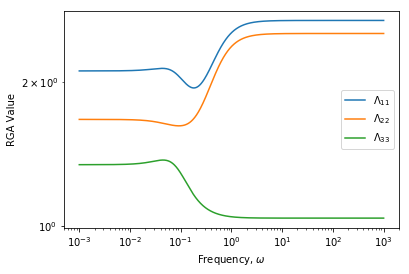

In [37]:
plt.loglog(omega, RGA_numbers[:,0], label="$\Lambda_{11}$")
plt.loglog(omega, RGA_numbers[:,1], label="$\Lambda_{22}$")
plt.loglog(omega, RGA_numbers[:,2], label="$\Lambda_{33}$")
plt.xlabel("Frequency, $\omega$")
plt.ylabel("RGA Value")
plt.legend(loc = 0)

In [44]:
utils.lcm_of_all_minors(G)

AttributeError: 'function' object has no attribute 'shape'